# Хасанов А.Р. М8О-404Б-17
# Лабораторная работа по эконометрике
# Прогнозирование временных рядов

In [1]:
import pandas as pd          
import numpy as np   
import math as math
import statsmodels.api as sm
import matplotlib.pyplot as plt  
from datetime import datetime      
from sklearn.utils import check_array
import warnings   
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#!pip install -U scikit-learn

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/ML/Tesla.csv')
#df = pd.read_csv('C:\\Users\\Астемир\\Desktop\\Эконометрика\\Tesla.csv')
#df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

# Преобразование данных

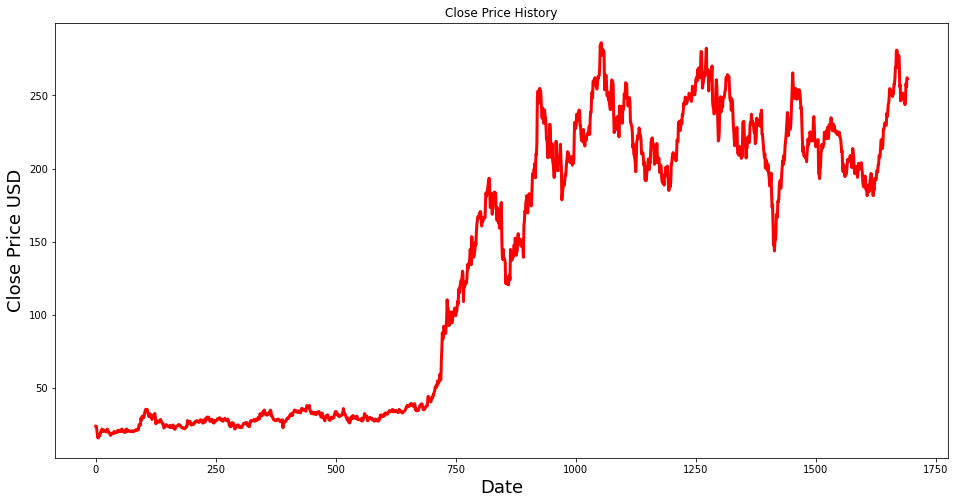

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red',linewidth=3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [6]:
data = df.filter(['Close'])
dataset = data.values 
training_data_len = math.ceil(len(dataset)*.8)  
training_data_len

1354

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU

In [9]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.01391355415474397]



In [10]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

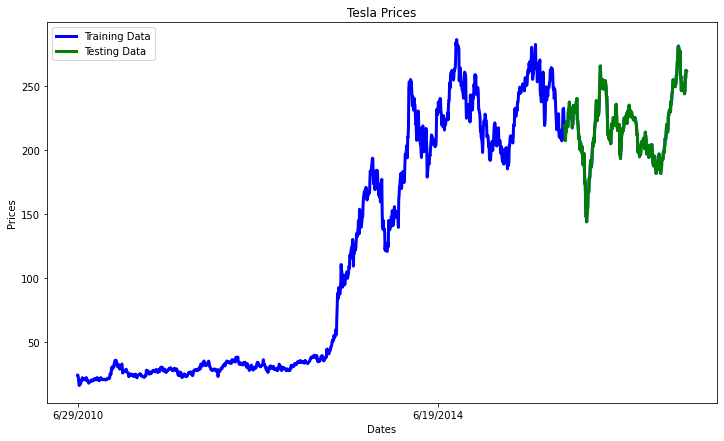

In [11]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data',linewidth=3)
plt.plot(test_data['Close'], 'green', label='Testing Data',linewidth=3)
plt.xticks(np.arange(0,1857, 1000), df['Date'][0:1857:1000])
plt.legend()

In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# LSTM

In [13]:
model =Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
#model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences= False))
#model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train,y_train, batch_size=1, epochs=15)

Epoch 1/15
1294/1294 [==============================] - 14s 8ms/step - loss: 0.0049
Epoch 2/15
1294/1294 [==============================] - 10s 7ms/step - loss: 0.0012
Epoch 3/15
1294/1294 [==============================] - 10s 7ms/step - loss: 0.0010
Epoch 4/15
1294/1294 [==============================] - 10s 7ms/step - loss: 8.4626e-04
Epoch 5/15
1294/1294 [==============================] - 10s 7ms/step - loss: 6.2360e-04
Epoch 6/15
1294/1294 [==============================] - 10s 7ms/step - loss: 5.9620e-04
Epoch 7/15
1294/1294 [==============================] - 10s 7ms/step - loss: 6.5652e-04
Epoch 8/15
1294/1294 [==============================] - 10s 7ms/step - loss: 7.0803e-04
Epoch 9/15
1294/1294 [==============================] - 10s 7ms/step - loss: 6.7928e-04
Epoch 10/15
1294/1294 [==============================] - 10s 7ms/step - loss: 5.3213e-04
Epoch 11/15
1294/1294 [==============================] - 10s 7ms/step - loss: 5.5687e-04
Epoch 12/15
1294/1294 [===================

In [16]:
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [19]:
%%time
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

CPU times: user 658 ms, sys: 17.9 ms, total: 676 ms
Wall time: 666 ms


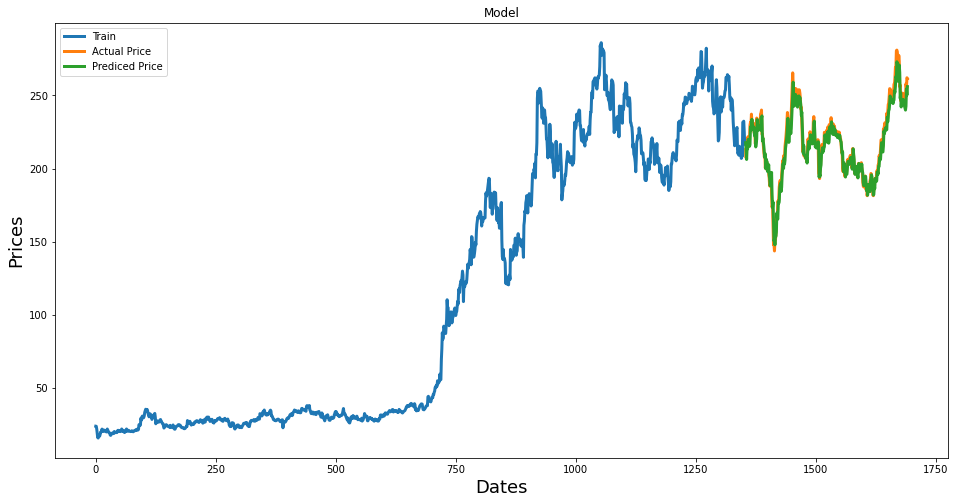

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Prices' ,fontsize=18)
plt.plot(train['Close'],linewidth=3)
plt.plot(valid[['Close','Predictions']],linewidth=3)
plt.legend(['Train','Actual Price','Prediced Price'], loc='upper_center')

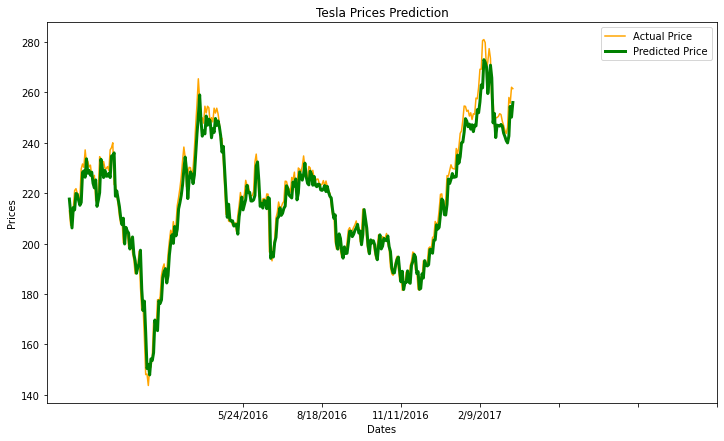

In [21]:
plt.figure(figsize=(12,7))
plt.plot(valid.index, valid['Close'], color='orange', label='Actual Price')
plt.plot(valid['Predictions'], color='green',label='Predicted Price',linewidth=3)
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [22]:
valid

,Close,Predictions
1354,212.940002,217.673080
1355,207.190002,211.814880
1356,214.309998,206.210815
1357,214.000000,214.310959
1358,221.070007,213.396362
...,...,...
1687,246.169998,239.967407
1688,258.000000,242.700577
1689,255.729996,254.466873
1690,262.049988,250.191269


In [23]:
from sklearn.metrics import mean_squared_error
mse_LSTM = mean_squared_error(y_test, predictions)
mse_LSTM

32.90543522910484

In [24]:
mape_LSTM = mean_absolute_percentage_error(y_test, predictions)
mape_LSTM

2.026407815557455

# ARIMA

In [25]:
%%time
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
from statsmodels.tsa.arima_model import ARIMA
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar+1)):
    model = ARIMA(history, order=(5,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>
CPU times: user 9min 29s, sys: 1min 5s, total: 10min 35s
Wall time: 9min 20s


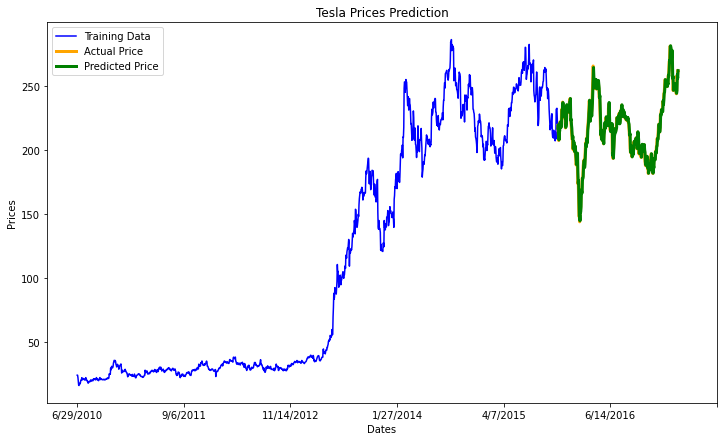

In [26]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, test_data['Close'], color='orange', label='Actual Price',linewidth=3)
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

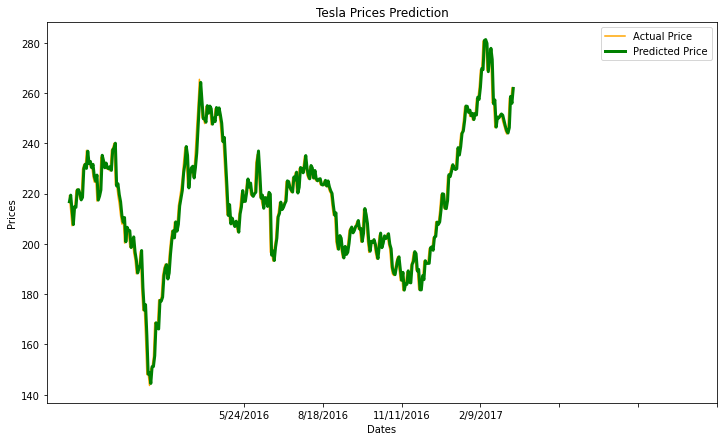

In [27]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, test_data['Close'], color='orange', label='Actual Price')
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [28]:
mse_ARIMA = mean_squared_error(test_ar, predictions)
mse_ARIMA

25.35429931455514

In [29]:
mape_ARIMA = mean_absolute_percentage_error(test_ar, predictions)
mape_ARIMA

12.87692219412168

# SARIMA

In [30]:
%%time
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train_sar = train_data['Close'].values
test_sar = test_data['Close'].values

history = [x for x in train_sar]
print(type(history))
predictions = list()
for t in range(len(test_sar+1)):
    model = sm.tsa.statespace.SARIMAX(history,order=(1,0,1),seasonal_order=(2,1,0,6))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_sar[t]
    history.append(obs)

<class 'list'>
CPU times: user 7min 53s, sys: 5min 46s, total: 13min 39s
Wall time: 6min 57s


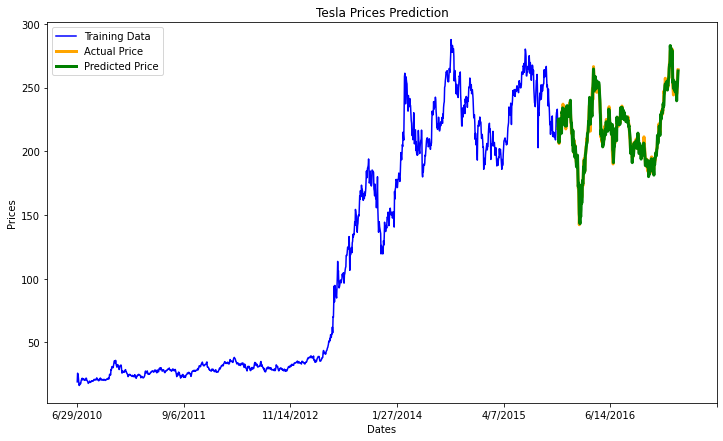

In [31]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, test_data['Open'], color='orange', label='Actual Price',linewidth=3)
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

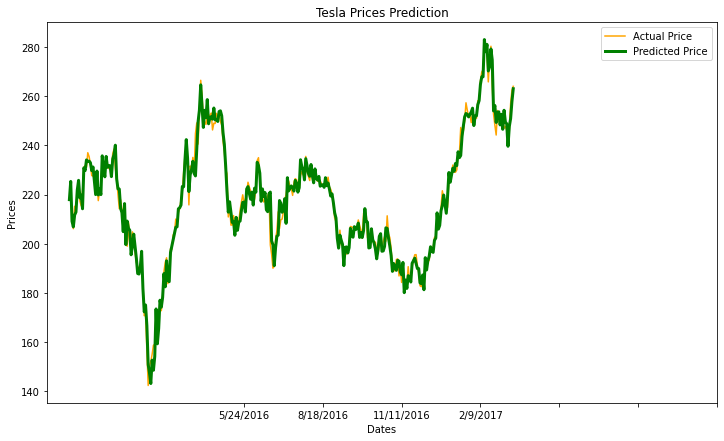

In [32]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, test_data['Open'], color='orange', label='Actual Price')
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [33]:
mse_SARIMA = mean_squared_error(test_sar, predictions)
mse_SARIMA

31.981308769405135

In [34]:
mape_SARIMA = mean_absolute_percentage_error(test_sar, predictions)
mape_SARIMA

2.014721089141335

# XGBoost

In [35]:
from xgboost import XGBRegressor 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train_data['Date'] = le.fit_transform(train_data['Date'].astype('str'))
test_data['Date'] = le.fit_transform(test_data['Date'].astype('str'))
X_train = train_data.drop(['Close'],axis=1)
y_train = train_data['Close']
X_test = test_data.drop(['Close'],axis=1)
y_test = test_data['Close']

In [36]:
train_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,937,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,945,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,970,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,1017,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,1080,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1348,320,227.000000,232.740005,225.199997,231.630005,12726400,231.630005
1349,325,230.580002,234.580002,229.190002,231.770004,4496800,231.770004
1350,329,230.699997,233.360001,229.500000,232.360001,2445300,232.360001
1351,341,232.990005,232.990005,224.309998,225.330002,3850900,225.330002


In [37]:
%%time
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}
eval_set = [(X_train, y_train), (X_test, y_test)]
model = XGBRegressor(eval_set=eval_set,objective='reg:squarederror')
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.001, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 42}
Best validation score = 0.9723439592638783
CPU times: user 5min 30s, sys: 5.56 s, total: 5min 35s
Wall time: 5min 34s


In [38]:
%%time

model =XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

CPU times: user 473 ms, sys: 11.9 ms, total: 485 ms
Wall time: 483 ms


In [39]:
predictions = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'predictions = {predictions[:5]}')

y_true = [219.080002 212.940002 207.190002 214.309998 214.      ]
predictions = [218.95668 212.84427 206.82402 214.04343 214.0111 ]


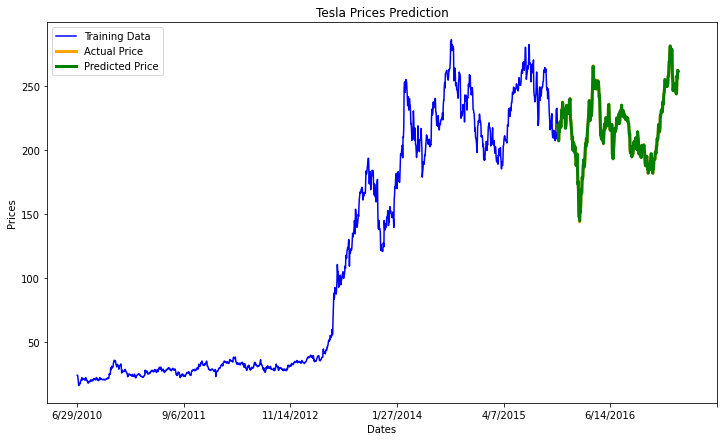

In [40]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, test_data['Close'], color='orange', label='Actual Price',linewidth=3)
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

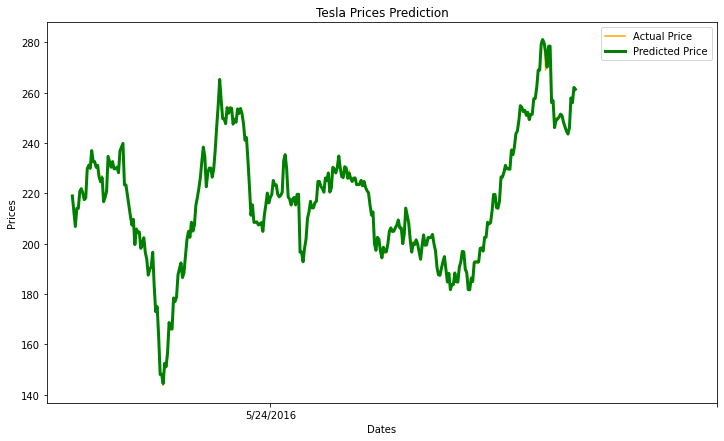

In [41]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, test_data['Close'], color='orange', label='Actual Price')
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.xticks(np.arange(1486,1856, 300), df['Date'][1486:1856:300])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [42]:
mse_XGB = mean_squared_error(y_test, predictions)
mse_XGB

0.3767644974334298

In [43]:
mape_XGB = mean_absolute_percentage_error(y_test, predictions)
mape_XGB

0.14844370834445314

# Simple Exponential Smoothing(SES)

In [44]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [45]:
%%time
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train = train_data['Close'].values
test = test_data['Close'].values
model = SimpleExpSmoothing(train).fit(smoothing_level=0.7)

CPU times: user 6.89 ms, sys: 1.96 ms, total: 8.85 ms
Wall time: 10.7 ms


In [46]:
predictions = model.forecast(len(test))

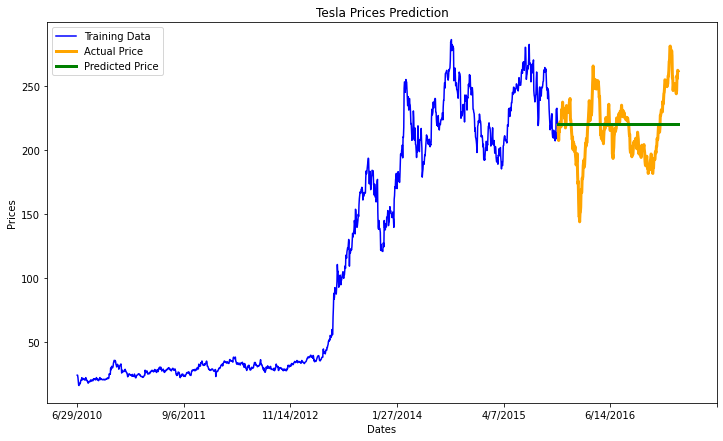

In [47]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, test_data['Close'], color='orange', label='Actual Price',linewidth=3)
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

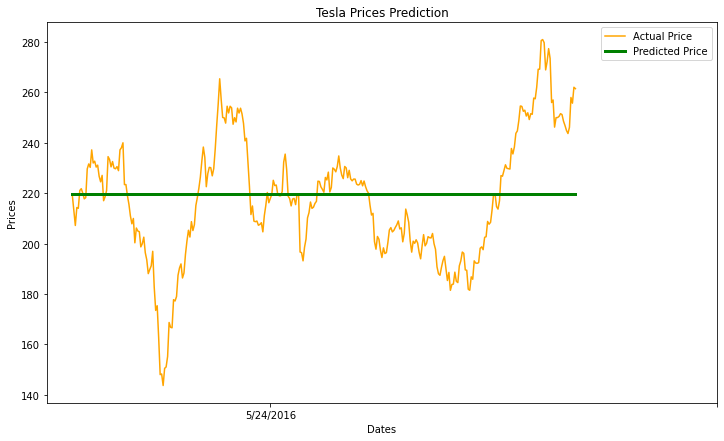

In [48]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, test_data['Close'], color='orange', label='Actual Price')
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.xticks(np.arange(1486,1856, 300), df['Date'][1486:1856:300])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [49]:
mse_SES = mean_squared_error(test, predictions)
mse_SES

608.9902073916656

In [50]:
mape_SES = mean_absolute_percentage_error(test, predictions)
mape_SES

9.247498453904369

# Exponential Smoothing(HW)

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [52]:
%%time
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train = train_data['Close'].values
test = test_data['Close'].values
model = ExponentialSmoothing(train, seasonal_periods=7, trend='add', seasonal='add').fit(smoothing_level = 0.7)

CPU times: user 162 ms, sys: 746 µs, total: 163 ms
Wall time: 170 ms


In [53]:
predictions = model.forecast(len(test))

In [54]:
mse_ESHW = mean_squared_error(test, predictions)
mse_ESHW

1357.5604818688973

In [55]:
mape_ESHW = mean_absolute_percentage_error(test, predictions)
mape_ESHW

15.00355361290848

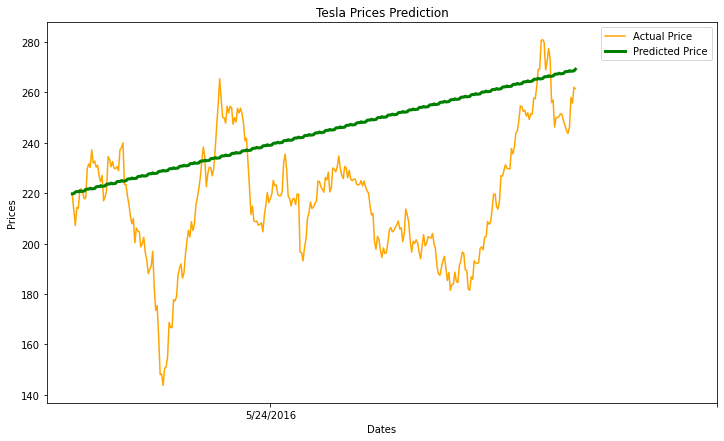

In [56]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, test_data['Close'], color='orange', label='Actual Price')
plt.plot(test_data.index, predictions, color='green',label='Predicted Price',linewidth=3)
plt.xticks(np.arange(1486,1856, 300), df['Date'][1486:1856:300])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

# Итоговые результаты

In [57]:
MSE = [mse_LSTM, mse_ARIMA, mse_SARIMA, mse_XGB, mse_SES, mse_ESHW]
MAPE = [mape_LSTM, mape_ARIMA, mape_SARIMA, mape_XGB, mape_SES, mape_ESHW]
MSE = [round(i,4) for i in MSE]
MAPE = [round(i,4) for i in MAPE]
Model = ['LSTM','ARIMA','SARIMA','XGBoost','SimpleES','ESHW']
new_models_dataframe2=pd.DataFrame({'MSE':MSE,'MAPE':MAPE},index=Model)       
new_models_dataframe2

,MSE,MAPE
LSTM,32.9054,2.0264
ARIMA,25.3543,12.8769
SARIMA,31.9813,2.0147
XGBoost,0.3768,0.1484
SimpleES,608.9902,9.2475
ESHW,1357.5605,15.0036


# Выводы

 ## Самый лучший прогноз получился при использовании XGBoost.
 ## Хуже всех сработала модель сглаживания Хольтса-Винтерса и простое экспоненциальное сглаживание.
 ## Модели ARIMA, SARIMA и LSTM также показали себя неплохо.